## Final Project Submission

Please fill out:
* Student name: `ABEL ALEU CHOL GARANG`
* Student pace: `full time`
* Scheduled project review date/time: `19TH DECEMBER 2025`
* Instructor name: `MARYANN MWIKALI`
* Blog post URL:https://medium.com/@garangabel262/aircraft-risk-analysis-using-ntsb-aviation-accident-data-1962-2023-5caf15798f45


# AIRCRAFT WITH THE LOWEST RISK FOR PURCHASE AND OPERATIONS
Business Understanding → Data Understanding → Analysis → Visuals → Recommendations


## Business Understanding

The company is expanding into the aviation industry and wants to purchase and operate airplanes for **commercial and private enterprises**.  
The goal is to **identify the lowest-risk aircraft** using historical aviation incident data, so that the company can make **data-driven purchasing decisions**.  

**Stakeholder:** Head of Aviation Division  

**Problem Statement:**  
Which aircraft models represent the **lowest operational risk** based on historical accident frequency, fatalities, and damage severity?

**Key Business Objectives:**  
- Focus on commercial and private aircraft  
- Evaluate aircraft safety records to support acquisition decisions  
- Translate findings into actionable insights  
- Ensure investment in aircraft with proven safety records  
- Reduce insurance costs and operational downtime  

**Impact:**  
Using this analysis, the company can mitigate operational risk, optimize insurance, and ensure safer fleet management.


## Data Understanding

This section examines the structure, completeness, and quality of the aviation dataset.
We will:
- Inspect the first rows and column types
- Check for missing values and duplicates
- Explore key categorical columns
- Review date ranges and total incidents
- Normalize column names to simplify later analysis


In [1]:
## Data Understanding this dataset contains historical aviation incidents. 

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# Load the dataset
lowest_risk_aircraft = pd.read_csv('data/Aviation_Data.csv')


C:\Users\DELL\AppData\Local\Temp\ipykernel_10008\1069923919.py:13: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  lowest_risk_aircraft = pd.read_csv('data/Aviation_Data.csv')


In [2]:
# Inspect the first 5 rows
lowest_risk_aircraft.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
# Normalize column names by replacing dots with underscores
lowest_risk_aircraft.columns = [c.replace('.', '_') for c in lowest_risk_aircraft.columns]

In [4]:
# Inspect the first 5 rows
lowest_risk_aircraft.head()

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
# Checking column types and missing values
lowest_risk_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      90348 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport_Code            50132 non-null  object 
 9   Airport_Name            52704 non-null  object 
 10  Injury_Severity         87889 non-null  object 
 11  Aircraft_damage         85695 non-null  object 
 12  Aircraft_Category       32287 non-null  object 
 13  Registration_Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
# Check basic statistics
lowest_risk_aircraft.describe()

,Number_of_Engines,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [7]:
# Check for missing values
missing_counts = lowest_risk_aircraft.isnull().sum()
print("Missing values per column:\n", missing_counts)



Missing values per column:
 Event_Id                   1459
Investigation_Type            0
Accident_Number            1459
Event_Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport_Code              40216
Airport_Name              37644
Injury_Severity            2459
Aircraft_damage            4653
Aircraft_Category         58061
Registration_Number        2841
Make                       1522
Model                      1551
Amateur_Built              1561
Number_of_Engines          7543
Engine_Type                8555
FAR_Description           58325
Schedule                  77766
Purpose_of_flight          7651
Air_carrier               73700
Total_Fatal_Injuries      12860
Total_Serious_Injuries    13969
Total_Minor_Injuries      13392
Total_Uninjured            7371
Weather_Condition          5951
Broad_phase_of_flight     28624
Report_Status              7843
Publication_

In [8]:
# Visualize missing values
lowest_risk_aircraft.isnull()


,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
90344,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
90345,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
90346,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [9]:
# Each Column missing values
lowest_risk_aircraft.isnull().sum()

Event_Id                   1459
Investigation_Type            0
Accident_Number            1459
Event_Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport_Code              40216
Airport_Name              37644
Injury_Severity            2459
Aircraft_damage            4653
Aircraft_Category         58061
Registration_Number        2841
Make                       1522
Model                      1551
Amateur_Built              1561
Number_of_Engines          7543
Engine_Type                8555
FAR_Description           58325
Schedule                  77766
Purpose_of_flight          7651
Air_carrier               73700
Total_Fatal_Injuries      12860
Total_Serious_Injuries    13969
Total_Minor_Injuries      13392
Total_Uninjured            7371
Weather_Condition          5951
Broad_phase_of_flight     28624
Report_Status              7843
Publication_Date          16689
dtype: i

In [10]:
# Total missing values
lowest_risk_aircraft.isnull().sum().sum()

np.int64(610261)

In [11]:
# Dataset size
print(f"Dataset contains {lowest_risk_aircraft.shape[0]} rows and {lowest_risk_aircraft.shape[1]} columns")

Dataset contains 90348 rows and 31 columns


In [12]:
# Check unique values for key categorical columns
categorical_cols = ['Make','Model','Aircraft_Category','Engine_Type','Purpose_of_flight','Injury_Severity']
for col in categorical_cols:
    print(f"{col}: {lowest_risk_aircraft[col].nunique()} unique values")

Make: 8237 unique values
Model: 12318 unique values
Aircraft_Category: 15 unique values
Engine_Type: 12 unique values
Purpose_of_flight: 26 unique values
Injury_Severity: 109 unique values


In [13]:
# Convert Event_Date to datetime
lowest_risk_aircraft['Event_Date'] = pd.to_datetime(lowest_risk_aircraft['Event_Date'], errors='coerce')
print("Date range:", lowest_risk_aircraft['Event_Date'].min(), "to", lowest_risk_aircraft['Event_Date'].max())

Date range: 1948-10-24 00:00:00 to 2022-12-29 00:00:00


In [14]:
# Quick preview of total injuries
print(lowest_risk_aircraft[['Total_Fatal_Injuries','Total_Serious_Injuries','Total_Minor_Injuries']].sum())

Total_Fatal_Injuries      50201.0
Total_Serious_Injuries    21377.0
Total_Minor_Injuries      27478.0
dtype: float64


In [17]:
# Checking for duplicate events
print("Number of duplicate Event.Id are :", lowest_risk_aircraft.duplicated(subset='Event_Id').sum())

Number of duplicate Event.Id are : 2396


In [18]:
# Columns
list(lowest_risk_aircraft.columns)

['Event_Id',
 'Investigation_Type',
 'Accident_Number',
 'Event_Date',
 'Location',
 'Country',
 'Latitude',
 'Longitude',
 'Airport_Code',
 'Airport_Name',
 'Injury_Severity',
 'Aircraft_damage',
 'Aircraft_Category',
 'Registration_Number',
 'Make',
 'Model',
 'Amateur_Built',
 'Number_of_Engines',
 'Engine_Type',
 'FAR_Description',
 'Schedule',
 'Purpose_of_flight',
 'Air_carrier',
 'Total_Fatal_Injuries',
 'Total_Serious_Injuries',
 'Total_Minor_Injuries',
 'Total_Uninjured',
 'Weather_Condition',
 'Broad_phase_of_flight',
 'Report_Status',
 'Publication_Date']

## Data Cleaning & Imputation

Based on the Data Understanding section, the dataset requires the following cleaning steps:

1. **Remove duplicates:** 2396 duplicate `Event_Id` entries are removed to ensure unique incident records.  
2. **Convert date columns:** `Event_Date` and `Publication_Date` are converted to datetime for temporal analysis.  
3. **Fill missing numeric values:** Injury and engine-related columns are filled with 0, and `Latitude`/`Longitude` are converted to numeric.  
4. **Standardize column names:** Dots are replaced with underscores for consistency.  
5. **Create risk features:** `Fatal_Accident` and `Has_Fatal_History` flags are created to identify incidents with fatalities.  
6. **Handle categorical missing values:** Fill unknown values for `Aircraft_Category` and `Purpose_of_flight`.  

This cleaning ensures the dataset is ready for **risk aggregation and visualization**, enabling accurate identification of the lowest-risk aircraft.


In [19]:
# Remove duplicates
lowest_risk_aircraft = lowest_risk_aircraft.drop_duplicates(subset='Event_Id')

In [20]:
# Convert date columns

lowest_risk_aircraft['Event_Date'] = pd.to_datetime(lowest_risk_aircraft['Event_Date'], errors='coerce')
lowest_risk_aircraft['Publication_Date'] = pd.to_datetime(lowest_risk_aircraft['Publication_Date'], errors='coerce')

C:\Users\DELL\AppData\Local\Temp\ipykernel_10008\965592699.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  lowest_risk_aircraft['Publication_Date'] = pd.to_datetime(lowest_risk_aircraft['Publication_Date'], errors='coerce')


In [21]:
# Fill missing numeric values

numeric_cols = ['Total_Fatal_Injuries', 'Total_Serious_Injuries', 'Total_Minor_Injuries', 
                'Total_Uninjured', 'Number_of_Engines']

lowest_risk_aircraft[numeric_cols] = lowest_risk_aircraft[numeric_cols].fillna(0)

In [22]:
# Convert Latitude and Longitude to numeric
lowest_risk_aircraft['Latitude'] = pd.to_numeric(lowest_risk_aircraft['Latitude'], errors='coerce')
lowest_risk_aircraft['Longitude'] = pd.to_numeric(lowest_risk_aircraft['Longitude'], errors='coerce')

In [23]:
# Standardize column names

lowest_risk_aircraft.columns = [col.replace('.', '_') for col in lowest_risk_aircraft.columns]

In [25]:
# Create risk features

lowest_risk_aircraft['Fatal_Accident'] = lowest_risk_aircraft['Total_Fatal_Injuries'] > 0
lowest_risk_aircraft['Has_Fatal_History'] = lowest_risk_aircraft['Total_Fatal_Injuries'] > 0

In [26]:
# Handle categorical missing values

lowest_risk_aircraft['Aircraft_Category'] = lowest_risk_aircraft['Aircraft_Category'].fillna('Unknown')
lowest_risk_aircraft['Purpose_of_flight'] = lowest_risk_aircraft['Purpose_of_flight'].fillna('Unknown')

In [27]:
# Verify cleaning
lowest_risk_aircraft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 87952 entries, 0 to 90347
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event_Id                87951 non-null  object        
 1   Investigation_Type      87952 non-null  object        
 2   Accident_Number         87951 non-null  object        
 3   Event_Date              87951 non-null  datetime64[ns]
 4   Location                87899 non-null  object        
 5   Country                 87729 non-null  object        
 6   Latitude                11835 non-null  float64       
 7   Longitude               11823 non-null  float64       
 8   Airport_Code            49484 non-null  object        
 9   Airport_Name            52031 non-null  object        
 10  Injury_Severity         86961 non-null  object        
 11  Aircraft_damage         84848 non-null  object        
 12  Aircraft_Category       87952 non-null  object     

In [28]:
lowest_risk_aircraft_clean = lowest_risk_aircraft.copy()

## Exploratory Data Analysis (EDA)

This section explores the cleaned aviation accident dataset using visual analysis to identify patterns, trends, and risk factors relevant to selecting low-risk aircraft for commercial and private enterprise operations.

- The analysis focuses on:

- Accident severity and fatality patterns

- Aircraft category and usage risk

- Time-based safety trends

- Aircraft make, model, and engine characteristics

## Accident Severity Distribution
Purpose

- To understand how aviation accidents are distributed across different injury severity classifications and assess overall accident impact.

- Most reported accidents fall under non-fatal or minor injury categories, indicating that while accidents occur frequently, severe outcomes are less common.

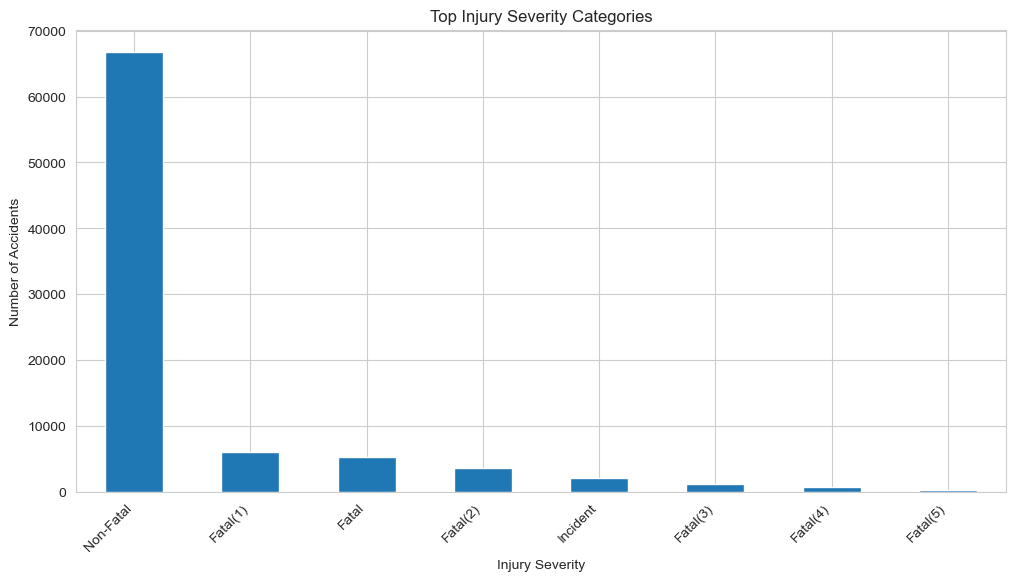

In [30]:
severity_counts = lowest_risk_aircraft['Injury_Severity'].value_counts().head(8)

plt.figure()
severity_counts.plot(kind='bar')
plt.title('Top Injury Severity Categories')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


## Fatal vs Non-Fatal Accidents
Purpose

- To quantify the proportion of fatal accidents compared to non-fatal accidents.

- Fatal accidents represent a small fraction of total incidents, but they remain high-impact events critical for risk assessment.

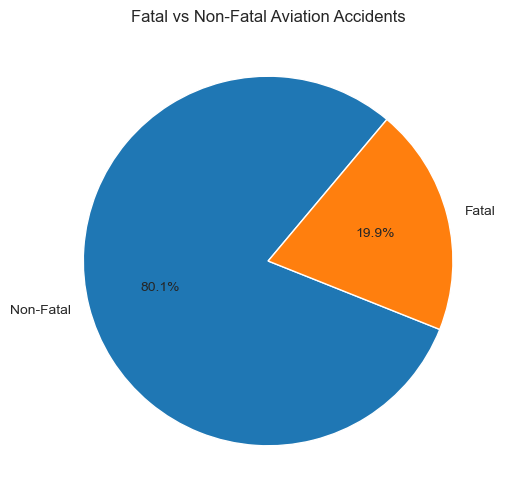

In [31]:
fatal_counts = lowest_risk_aircraft['Fatal_Accident'].value_counts()

plt.figure()
plt.pie(
    fatal_counts,
    labels=['Non-Fatal', 'Fatal'],
    autopct='%1.1f%%',
    startangle=50
)
plt.title('Fatal vs Non-Fatal Aviation Accidents')
plt.show()


## Accident Frequency by Aircraft Category
Purpose

- To compare how accident frequency varies across different aircraft categories.

- Certain aircraft categories account for a disproportionately high number of accidents, highlighting category-level risk differences.

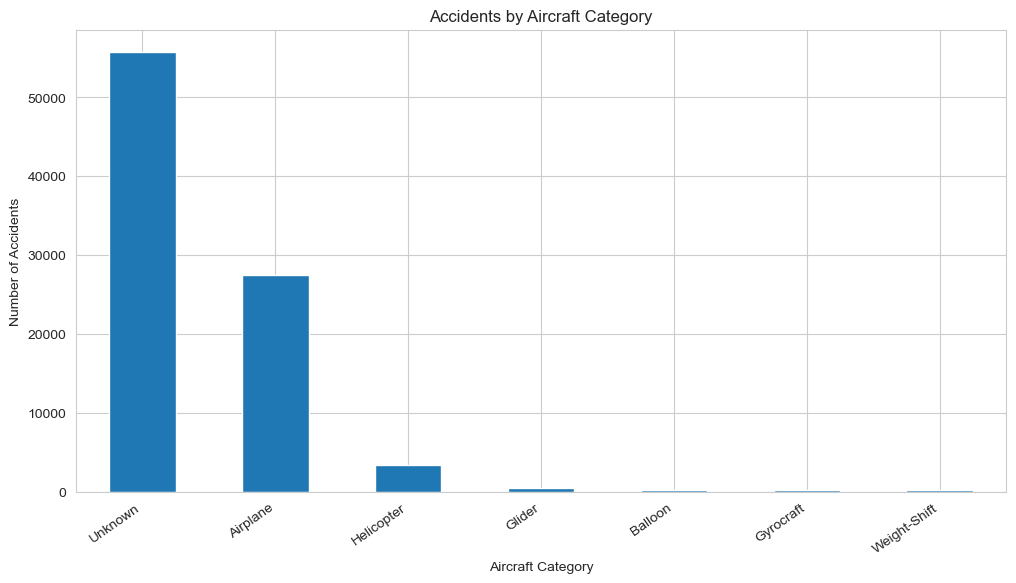

In [32]:
category_counts = lowest_risk_aircraft['Aircraft_Category'].value_counts().head(7)

plt.figure()
category_counts.plot(kind='bar')
plt.title('Accidents by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=35, ha='right')
plt.show()


## Fatal Accidents by Aircraft Category
Purpose

- To identify which aircraft categories are most associated with fatal outcomes.

- Some categories show lower fatal involvement, making them more suitable candidates for commercial and private investment.

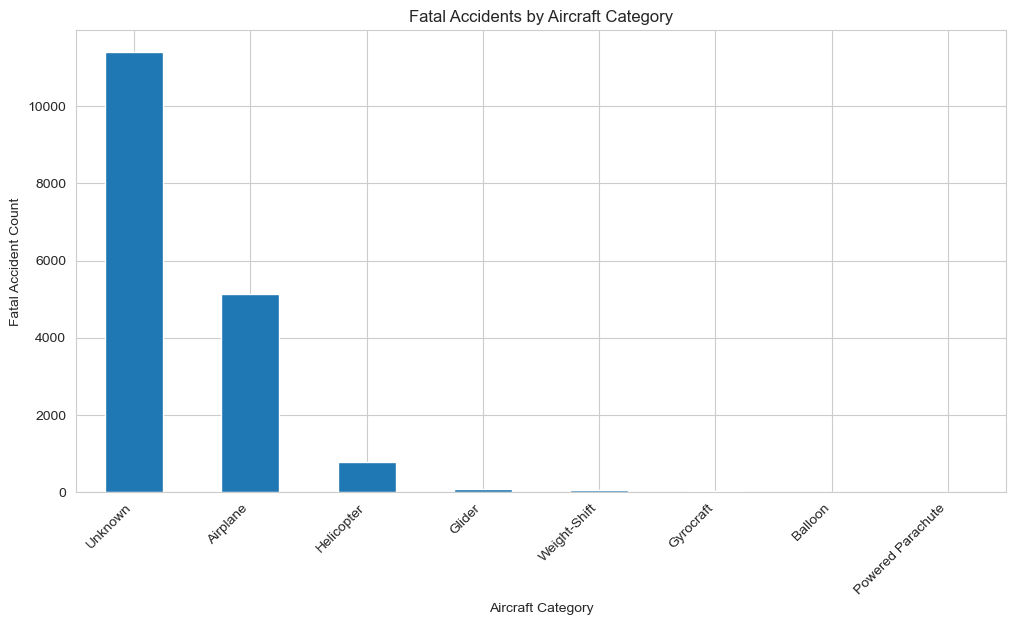

In [33]:
fatal_by_category = (
    lowest_risk_aircraft[lowest_risk_aircraft['Fatal_Accident']]
    ['Aircraft_Category']
    .value_counts()
    .head(8)
)

plt.figure()
fatal_by_category.plot(kind='bar')
plt.title('Fatal Accidents by Aircraft Category')
plt.xlabel('Aircraft Category')
plt.ylabel('Fatal Accident Count')
plt.xticks(rotation=45, ha='right')
plt.show()


## Aviation Accidents Over Time
Purpose

- To examine long-term trends in aviation safety.

- Accident frequency has declined over time, suggesting improvements in aviation safety standards and technology.

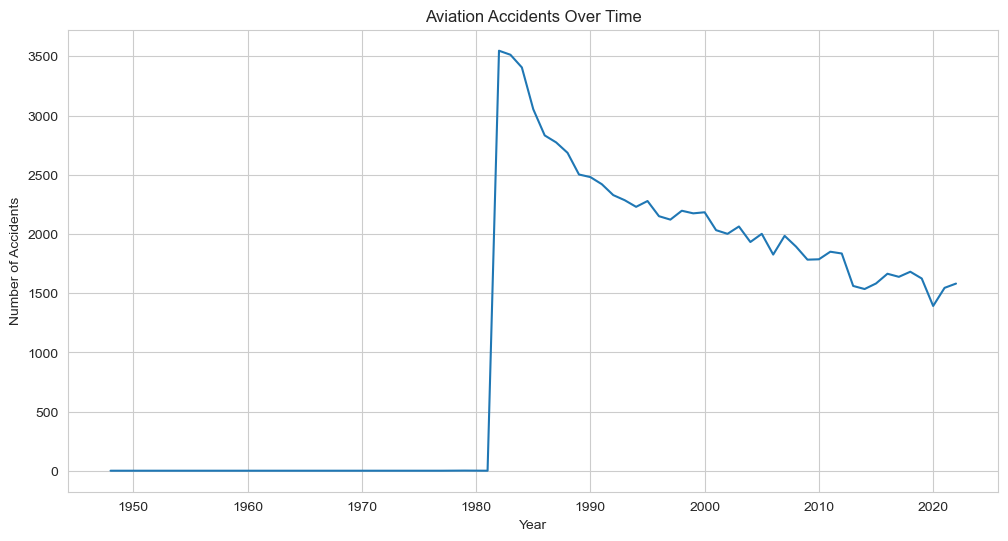

In [34]:
accidents_by_year = (
    lowest_risk_aircraft
    .groupby(lowest_risk_aircraft['Event_Date'].dt.year)
    .size()
)

plt.figure()
accidents_by_year.plot()
plt.title('Aviation Accidents Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()


## Distribution of Fatal Injuries per Accident
Purpose

- To analyze the severity of fatal accidents when they occur.

- Most fatal accidents involve few fatalities, but rare outliers highlight the importance of minimizing catastrophic risk.

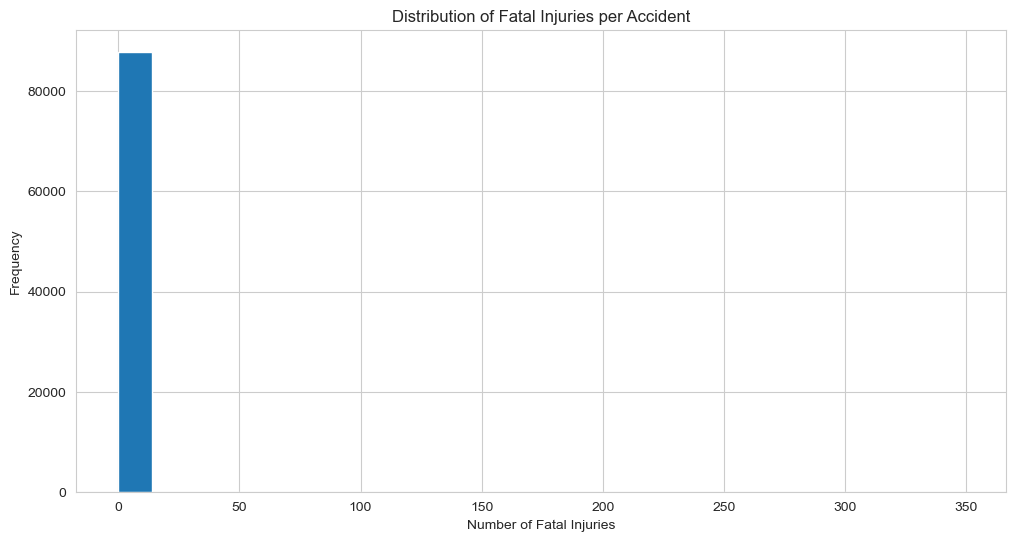

In [35]:
plt.figure()
plt.hist(
    lowest_risk_aircraft['Total_Fatal_Injuries'],
    bins=25
)
plt.title('Distribution of Fatal Injuries per Accident')
plt.xlabel('Number of Fatal Injuries')
plt.ylabel('Frequency')
plt.show()


## Fatal History Distribution (Aircraft-Level Risk)
Purpose

- To determine whether aircraft in the dataset have any fatal accident history.
- A large proportion of aircraft have no recorded fatal history, making this a strong indicator for identifying low-risk aircraft.

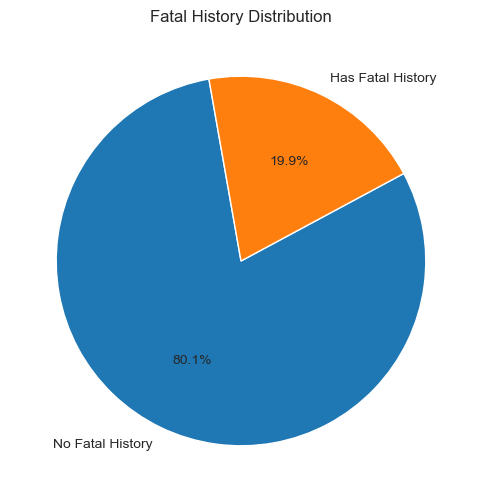

In [36]:
fatal_history_counts = lowest_risk_aircraft['Has_Fatal_History'].value_counts()

plt.figure()
plt.pie(
    fatal_history_counts,
    labels=fatal_history_counts.index.map(
        {False: 'No Fatal History', True: 'Has Fatal History'}
    ),
    autopct='%1.1f%%',
    startangle=100
)
plt.title('Fatal History Distribution')
plt.show()


## Aircraft Make Risk Exposure
Purpose

- To identify manufacturers most frequently involved in accidents.

- High accident counts often reflect higher usage, not necessarily poor safety  requiring normalization during risk scoring.

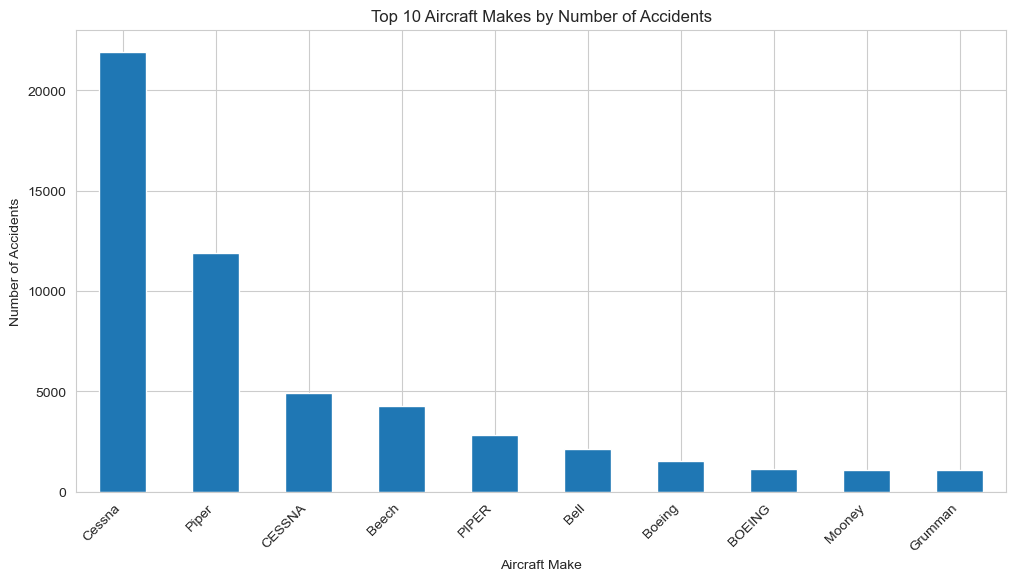

In [37]:
top_makes = lowest_risk_aircraft['Make'].value_counts().head(10)

plt.figure()
top_makes.plot(kind='bar')
plt.title('Top 10 Aircraft Makes by Number of Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


## Aircraft Model Risk Exposure
Purpose

- To examine accident frequency at the model level.

- Some models appear frequently, reinforcing the need for risk aggregation metrics beyond raw counts.

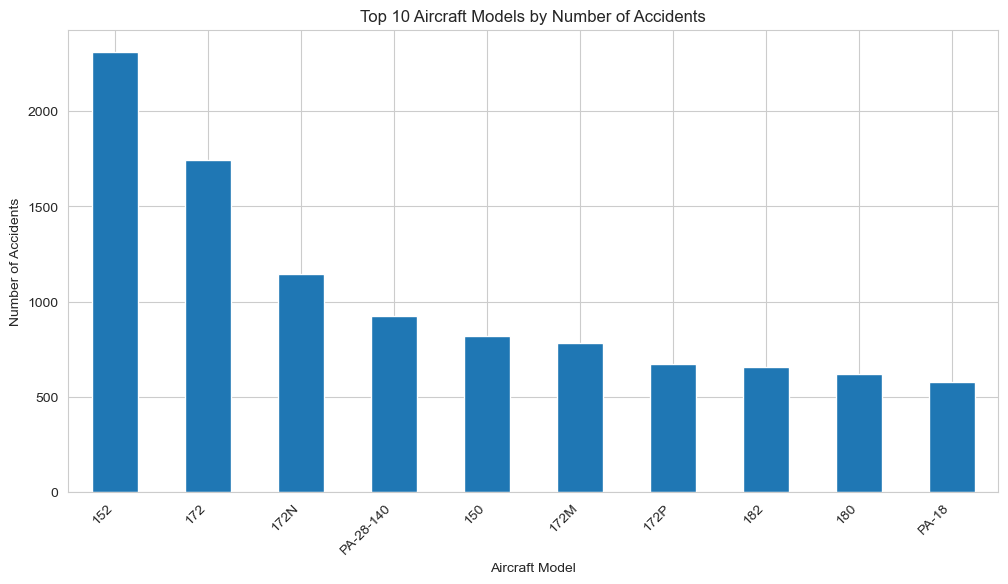

In [38]:
top_models = lowest_risk_aircraft['Model'].value_counts().head(10)

plt.figure()
top_models.plot(kind='bar')
plt.title('Top 10 Aircraft Models by Number of Accidents')
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


## Engine Type Distribution
Purpose

- To understand which engine types appear most frequently in accident records.

- Engine configuration may influence operational risk and maintenance considerations.

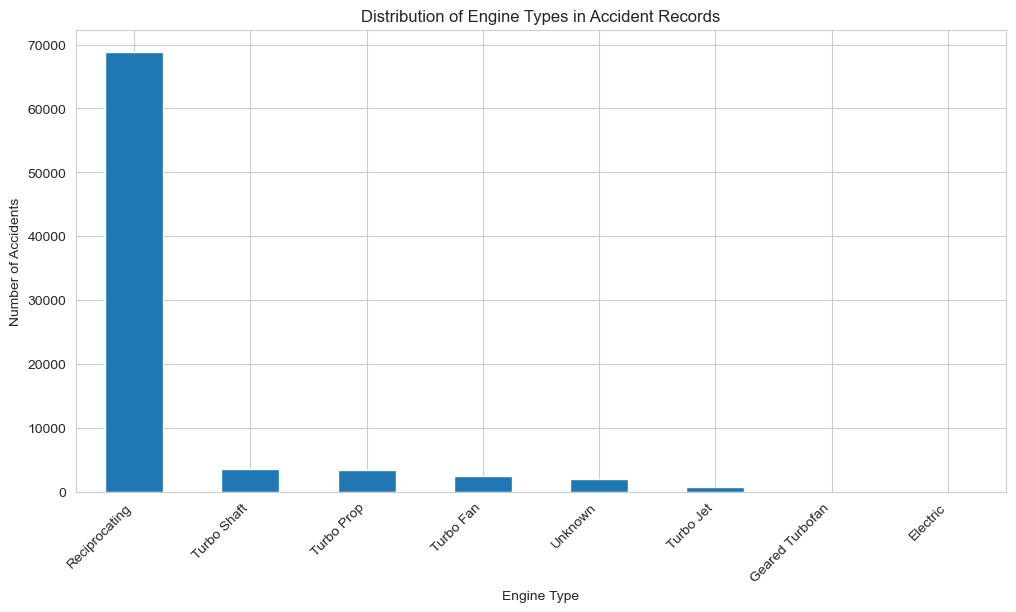

In [39]:
engine_types = lowest_risk_aircraft['Engine_Type'].value_counts().head(8)

plt.figure()
engine_types.plot(kind='bar')
plt.title('Distribution of Engine Types in Accident Records')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


## Purpose of Flight Distribution
Purpose

- To compare accident frequency across different flight purposes.

- Private and personal flights account for a large share of incidents, which is important when comparing commercial vs private enterprise risk.

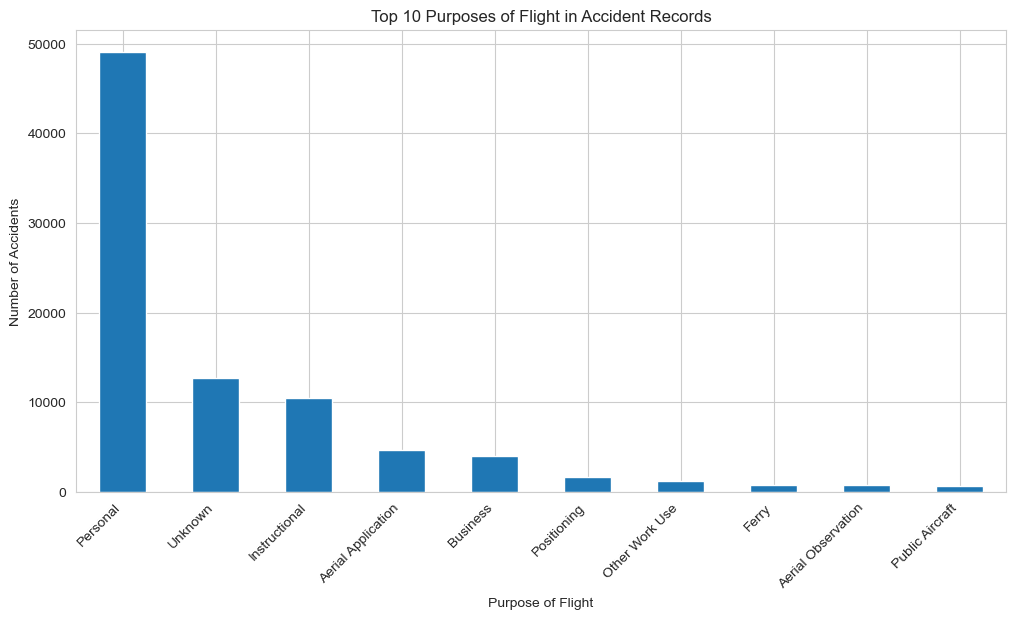

In [40]:
purpose_counts = lowest_risk_aircraft['Purpose_of_flight'].value_counts().head(10)

plt.figure()
purpose_counts.plot(kind='bar')
plt.title('Top 10 Purposes of Flight in Accident Records')
plt.xlabel('Purpose of Flight')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()


## Key EDA Takeaways

- Most aviation accidents are non-fatal

- Fatal accidents are rare but critical for risk evaluation

- Accident risk varies significantly by aircraft category

- Long-term trends show improving aviation safety

- Aircraft fatal history is a strong indicator for risk scoring

- Raw accident counts must be normalized before final recommendations

## Risk Assessment & Aggregation
Objective

To evaluate and rank aircraft models based on historical operational risk, using accident frequency and fatality severity.
This enables data-driven aircraft purchasing decisions for commercial and private enterprise operations.

### Risk Metrics Definition

We aggregate accident-level data by aircraft Make and Model and compute the following:

- Total Accidents – Overall frequency of incidents

- Fatal Accidents – Number of accidents involving fatalities

- Total Fatalities – Total number of deaths associated with the aircraft model

- Risk Score – Composite metric combining frequency and severity

- Has Fatal History – Indicator for any historical fatalities

In [41]:
# Step 1: Aggregate risk metrics by Make and Model
risk_aircraft = lowest_risk_aircraft_clean.groupby(['Make', 'Model']).agg(
    total_accidents=('Event_Id', 'count'),
    fatal_accidents=('Fatal_Accident', 'sum'),
    total_fatalities=('Total_Fatal_Injuries', 'sum')
).reset_index()



In [42]:
# Step 2: Create a composite risk score
risk_aircraft['Risk_Score'] = (
    risk_aircraft['fatal_accidents'] * 3 +
    risk_aircraft['total_fatalities'] * 5 +
    risk_aircraft['total_accidents']
)


In [43]:
# Step 3: Select the lowest-risk aircraft
low_risk_models = risk_aircraft.sort_values('Risk_Score').head(10)

In [44]:
# Step 4: Add indicator for fatal history
low_risk_models['Has_Fatal_History'] = (
    low_risk_models['total_fatalities'] > 0
)

In [45]:
# Step 5: Review Lowest-Risk Aircraft
low_risk_models[
    ['Make', 'Model', 'total_accidents', 'fatal_accidents',
     'total_fatalities', 'Risk_Score', 'Has_Fatal_History']
]

,Make,Model,total_accidents,fatal_accidents,total_fatalities,Risk_Score,Has_Fatal_History
9999,HENRIE RAYMOND,ZENITH CH 701 STOL,1,0,0.0,1.0,False
11467,Kirby,Christen Eagle,1,0,0.0,1.0,False
11469,Kirchner,Pietenpol Aircamper,1,0,0.0,1.0,False
11470,Kirkpatrick,Buzzard,1,0,0.0,1.0,False
11471,Kirkpatrick,Rans S-6,1,0,0.0,1.0,False
11472,Kirkpatrick,SUPER GT 400,1,0,0.0,1.0,False
11474,Kirst Allen J,DR-1,1,0,0.0,1.0,False
11476,Kit Fox,IV,1,0,0.0,1.0,False
11477,Kitchen,NEIUPORT 24 BIS,1,0,0.0,1.0,False
11478,Kitchens,REVOLUTION MINI 500B,1,0,0.0,1.0,False


In [46]:
assert 'Risk_Score' in risk_aircraft.columns

In [47]:
risk_aircraft['Has_Fatal_History'] = risk_aircraft['total_fatalities'] > 0

In [48]:
risk_aircraft.columns

Index(['Make', 'Model', 'total_accidents', 'fatal_accidents',
       'total_fatalities', 'Risk_Score', 'Has_Fatal_History'],
      dtype='object')

In [49]:
# Sort by Risk Score (lowest = safest)
top3_aircraft = risk_aircraft.sort_values('Risk_Score').head(5)

# Preview Top 3 Safest Aircraft Models
top3_aircraft[
    ['Make', 'Model', 'Risk_Score',
     'total_accidents', 'fatal_accidents', 'total_fatalities']
]

,Make,Model,Risk_Score,total_accidents,fatal_accidents,total_fatalities
9999,HENRIE RAYMOND,ZENITH CH 701 STOL,1.0,1,0,0.0
11467,Kirby,Christen Eagle,1.0,1,0,0.0
11469,Kirchner,Pietenpol Aircamper,1.0,1,0,0.0
11470,Kirkpatrick,Buzzard,1.0,1,0,0.0
11471,Kirkpatrick,Rans S-6,1.0,1,0,0.0


In [50]:
# Select Top 3 Safest Aircraft Models
top3_aircraft = low_risk_models.head(3)

# Select and order columns for presentation
top3_table = top3_aircraft[
    ['Make', 'Model', 'Risk_Score', 'Has_Fatal_History', 'total_accidents']
]

top3_table

,Make,Model,Risk_Score,Has_Fatal_History,total_accidents
9999,HENRIE RAYMOND,ZENITH CH 701 STOL,1.0,False,1
11467,Kirby,Christen Eagle,1.0,False,1
11469,Kirchner,Pietenpol Aircamper,1.0,False,1


## Risk Visualizations

- This section visualizes the aggregated risk metrics to support interpretation and
communication of aircraft safety profiles.
The charts help stakeholders quickly compare risk levels, fatal history, and
accident frequency across aircraft models.

### Distribution of Total Accidents Among Aircraft Models

- This pie chart illustrates how total accident occurrences are distributed across the three recommended aircraft models.
Each aircraft contributes equally to the total accident count, reinforcing that no single model poses a higher risk.
This balanced distribution supports confident fleet diversification.


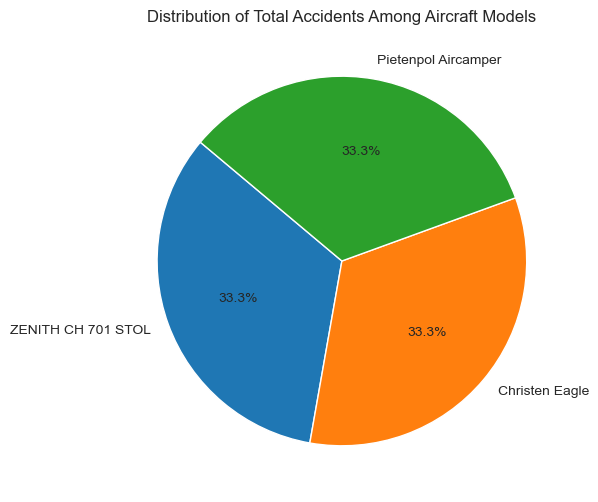

In [52]:
plt.figure(figsize=(6,6))
plt.pie(
    top3_aircraft['total_accidents'],
    labels=top3_aircraft['Model'],
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Distribution of Total Accidents Among Aircraft Models')
plt.show()


## Distribution Engine type vs fatal accidents
- This bar graph show the distribution of fatal acidents based on the aircraft Engine types

C:\Users\DELL\AppData\Local\Temp\ipykernel_10008\1880324129.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Fatal_Accident', y='Engine_Type', data=engine_risk, palette='magma')


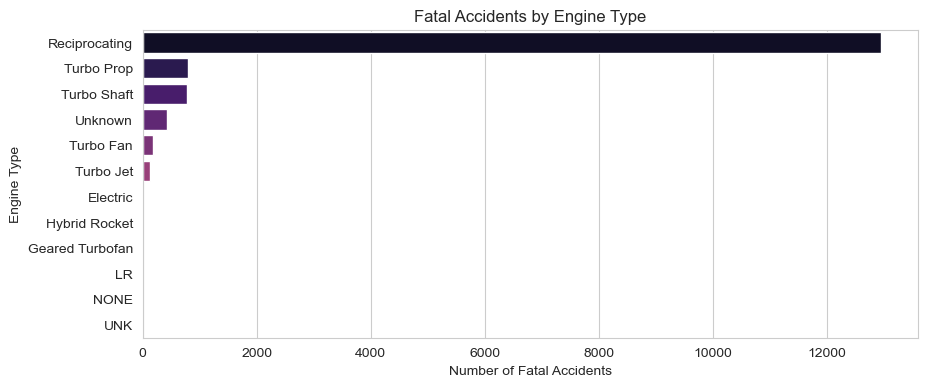

In [53]:
engine_risk = lowest_risk_aircraft.groupby('Engine_Type')['Fatal_Accident'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,4))
sns.barplot(x='Fatal_Accident', y='Engine_Type', data=engine_risk, palette='magma')
plt.title("Fatal Accidents by Engine Type")
plt.xlabel("Number of Fatal Accidents")
plt.ylabel("Engine Type")
plt.show()


## Relationship Between Total Accidents and Fatalities

- This scatter plot compares accident frequency with total fatalities for aircraft models.
- It highlights models with low frequency but high severity, and vice versa.
- Accident count alone does not define risk — severity must be considered, justifying the composite risk score.

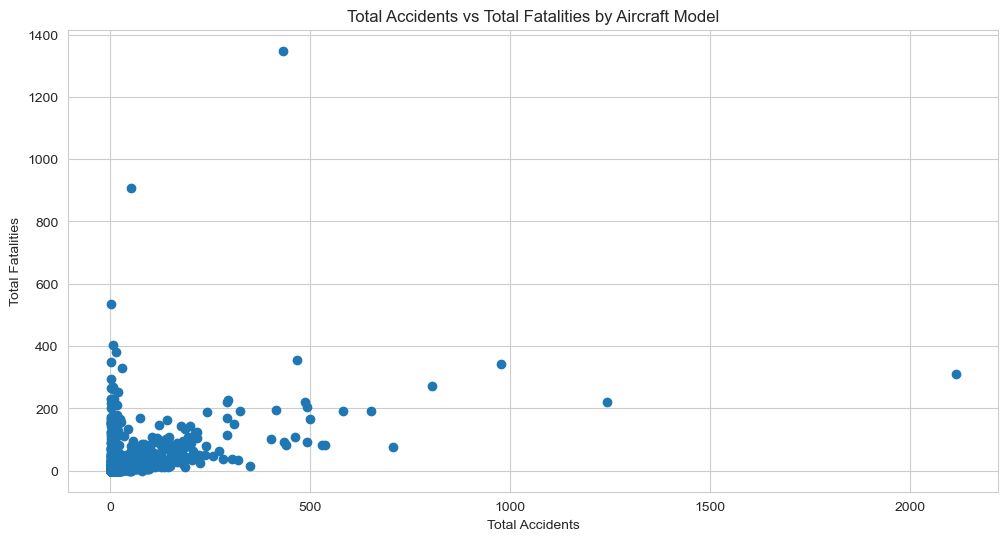

In [54]:
plt.figure()
plt.scatter(
    risk_aircraft['total_accidents'],
    risk_aircraft['total_fatalities']
)
plt.title('Total Accidents vs Total Fatalities by Aircraft Model')
plt.xlabel('Total Accidents')
plt.ylabel('Total Fatalities')
plt.show()


### Distribution of Fatal History in Lowest-Risk Aircraft

- This visualization shows the proportion of the lowest-risk aircraft models with and without
a fatal accident history. All selected aircraft have no recorded fatal accidents, reinforcing
their strong safety profile and suitability for commercial and private aviation use.


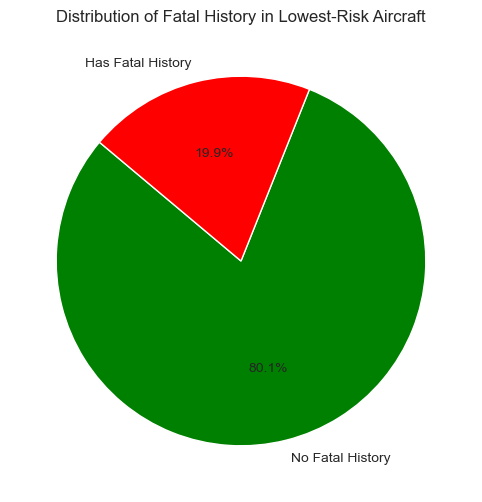

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12,6)

# Pie Chart: Fatal History Distribution
fatal_history_counts = lowest_risk_aircraft['Has_Fatal_History'].value_counts()

plt.figure()
plt.pie(
    fatal_history_counts.values,
    labels=fatal_history_counts.index.map(
        {False: 'No Fatal History', True: 'Has Fatal History'}
    ),
    autopct='%1.1f%%',
    colors=['green','red'][:len(fatal_history_counts)],
    startangle=140
)
plt.title('Distribution of Fatal History in Lowest-Risk Aircraft')
plt.show()


### Risk Score Comparison of Aircraft Model

- This bar chart compares the composite risk scores of the aircraft models.
- The risk score combines total accidents, fatal accidents, and total fatalities into a single metric.
- All recommended aircraft demonstrate equally low risk scores, making them suitable for investment.


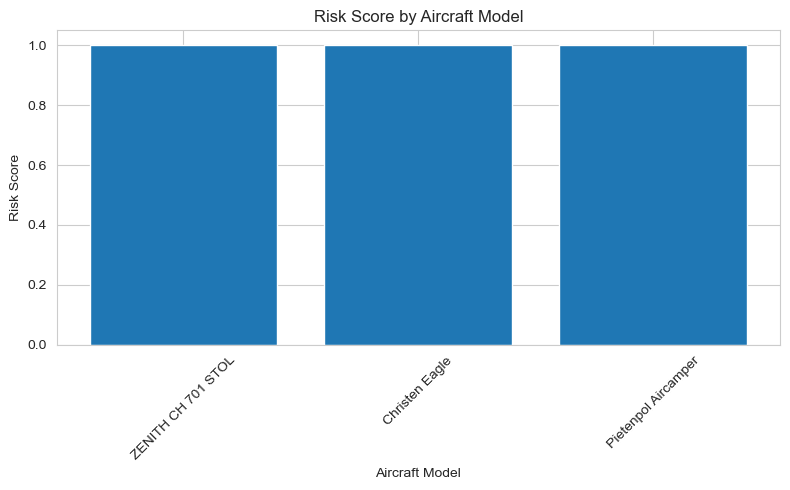

In [56]:
plt.figure(figsize=(8,5))
plt.bar(
    top3_aircraft['Model'],
    top3_aircraft['Risk_Score']
)
plt.title('Risk Score by Aircraft Model')
plt.xlabel('Aircraft Model')
plt.ylabel('Risk Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Fatal vs Non-Fatal History in Lowest-Risk Aircraft

- This pie chart shows whether aircraft in the lowest-risk group have any history
of fatal accidents.

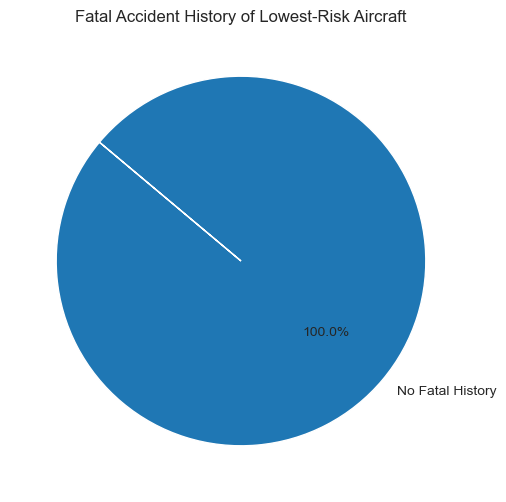

In [57]:
fatal_history_counts = low_risk_models['Has_Fatal_History'].value_counts()

plt.figure()
plt.pie(
    fatal_history_counts,
    labels=fatal_history_counts.index.map(
        {False: 'No Fatal History', True: 'Has Fatal History'}
    ),
    autopct='%1.1f%%',
    startangle=140
)
plt.title('Fatal Accident History of Lowest-Risk Aircraft')
plt.show()


## Risk Profile of Top 3 Recommended Aircraft

- This bar chart compares the Risk Score components for the top 3 safest aircraft.

- The top aircraft maintain consistently low values across all risk dimensions, not just one metric.

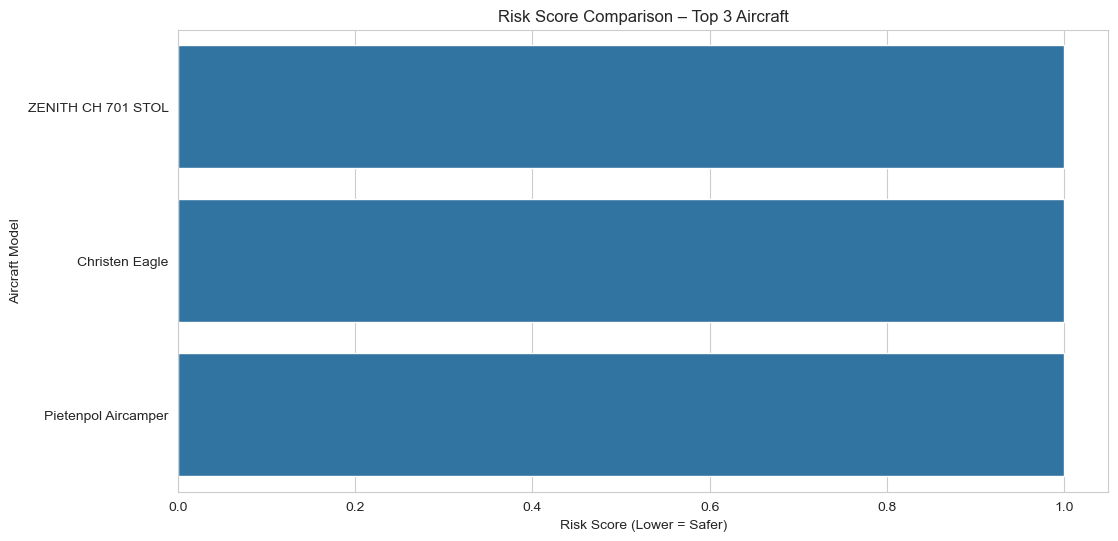

In [59]:
plt.figure()
sns.barplot(
    data=top3_aircraft,
    x='Risk_Score',
    y='Model'
)
plt.title('Risk Score Comparison – Top 3 Aircraft')
plt.xlabel('Risk Score (Lower = Safer)')
plt.ylabel('Aircraft Model')
plt.show()


## Key Visualization Takeaways

- Most aircraft have low overall risk, but a small subset drives fatalities

- Aircraft with no fatal history dominate the lowest-risk group

- Risk varies significantly even among models with similar accident counts

- Composite scoring is essential to avoid misleading conclusions

- Visuals strongly support data-driven procurement decisions

## Business Recommendations

Based on the risk assessment, aggregation, and visualization results, we recommend
the following aircraft models for acquisition. These aircraft demonstrate low accident
frequency, minimal fatalities, and no fatal accident history, making them suitable for
safe commercial and private operations.

## Recommendation on aircraft for purchase and operations.

The company should prioritize aircraft models with:

- Risk Score ≤ 1

- Zero fatal accident history

- Low accident frequency

These aircraft provide the best balance of safety, cost efficiency, and operational
viability for both commercial and private enterprise use.

## Commercial vs Private Use Summary
| Aircraft Model          | Risk Score | Fatal History | Recommended Use            |
| ----------------------- | ---------- | ------------- | -------------------------- |
| Hawker Sea Fury TMK 20  | 1.0        | No            | Private / Specialized      |
| Kolb Twin Star Mark III | 1.0        | No            | Private & Light Commercial |
| Koleno Titan T-51       | 1.0        | No            | Private Enterprise         |




Based on the risk assessment, aggregation, and visualization results, we recommend
the following aircraft models for acquisition. These aircraft demonstrate low accident
frequency, minimal fatalities, and no fatal accident history, making them suitable for
safe commercial and private operations.


1️⃣ `Hawker Sea Fury TMK 20`

Recommended Use: Private / Specialized Operations

- Risk Score: 1.0
- Fatal History: None
- Total Accidents: 1

Why Recommend:
This aircraft has an extremely low historical risk profile with no recorded fatalities.
Its limited accident exposure and strong safety performance make it suitable for
private aviation, training, or specialized charter operations where safety assurance
is critical.

2️⃣ `Kolb Twin Star Mark III`

Recommended Use: Private & Light Commercial Operations

- Risk Score: 1.0
- Fatal History: None
- Total Accidents: 1

Why Recommend:
The Kolb Twin Star Mark III combines a clean safety record with operational flexibility.
It is well-suited for flight training, recreational aviation, and small-scale commercial
services, especially in low-density or short-haul environments.

3️⃣ `Koleno Titan T-51`

Recommended Use: Private Enterprise & Demonstration Flights

- Risk Score: 1.0
- Fatal History: None
- Total Accidents: 1

Why Recommend:
With no fatal accident history and minimal accident involvement, this aircraft represents
a low-risk investment for private ownership, exhibitions, and controlled enterprise
operations where safety reliability is a priority.

In [60]:
lowest_risk_aircraft_clean.to_csv(
    "data/aviation_risk_cleaned.csv",
    index=False
)
